1. 문제 정의 및 인과 관계 가설 수립

문제: 반도체 제조 과정에서 발생하는 Defect의 주요 원인을 파악하고, 각 요인이 Defect 발생에 미치는 인과적 영향을 분석하고자 합니다.

가설:
- 온도가 높을수록 Defect 발생 확률이 증가할 것이다.
- 압력이 적정 범위를 벗어날수록 Defect 발생 확률이 증가할 것이다.
- 공정 시간이 길어질수록 Defect 발생 확률이 증가할 것이다.
- 원자재 순도가 낮을수록 Defect 발생 확률이 증가할 것이다.
2. 데이터 수집 및 전처리

   Temperature  Pressure  ProcessTime  MaterialPurity  Defect
0   154.967142  5.699678    56.624109        0.981874       1
1   148.617357  5.462317    59.277407        0.998357       0
2   156.476885  5.029815    56.037900        0.925967       0
3   165.230299  4.676532    58.460192        0.996972       0
4   147.658466  5.349112    50.531927        0.943123       0
       Temperature     Pressure  ProcessTime  MaterialPurity       Defect
count  1000.000000  1000.000000  1000.000000     1000.000000  1000.000000
mean    150.193321     5.035418    60.029171        0.949037     0.173000
std       9.792159     0.498727     4.917271        0.028622     0.378437
min     117.587327     3.529806    44.902439        0.900003     0.000000
25%     143.524097     4.696879    56.760002        0.924468     0.000000
50%     150.253006     5.031539    59.998746        0.948355     0.000000
75%     156.479439     5.364441    63.304577        0.973023     0.000000
max     188.527315     6.596554    7

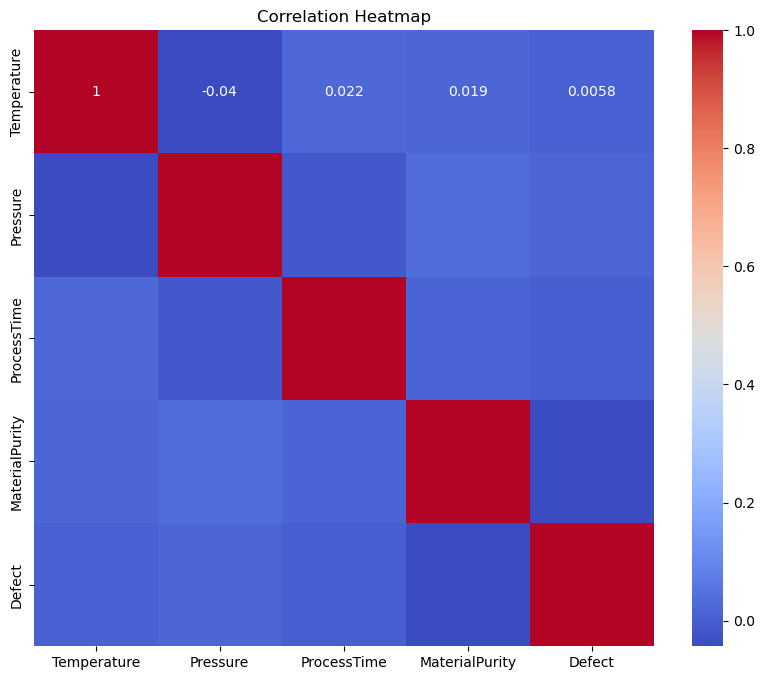

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 난수 시드 설정
np.random.seed(42)

# 데이터 생성
n_samples = 1000

temperature = np.random.normal(150, 10, n_samples)  # 평균 150도, 표준편차 10
pressure = np.random.normal(5, 0.5, n_samples)  # 평균 5 bar, 표준편차 0.5
process_time = np.random.normal(60, 5, n_samples)  # 평균 60분, 표준편차 5
material_purity = np.random.uniform(0.9, 1.0, n_samples)  # 90% ~ 100% 균일 분포

# Defect 확률 계산 (인과관계를 반영한 복잡한 함수)
def defect_probability(temp, press, time, purity):
    prob = (
        0.1 * (temp - 150)**2 / 100 +  # 온도의 영향
        0.2 * (press - 5)**2 +         # 압력의 영향
        0.05 * (time - 60) / 10 +      # 공정 시간의 영향
        0.5 * (1 - purity)             # 순도의 영향
    )
    return np.clip(prob, 0, 1)         # 0과 1 사이로 제한

defect_prob = defect_probability(temperature, pressure, process_time, material_purity)
defect = np.random.binomial(1, defect_prob)

# 데이터프레임 생성
data = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'ProcessTime': process_time,
    'MaterialPurity': material_purity,
    'Defect': defect
})

# 데이터 확인
print(data.head())
print(data.describe())

# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3. 인과 그래프 모델링

초기 인과 그래프를 DAG(Directed Acyclic Graph)로 표현해보겠습니다.

In [5]:
from graphviz import Digraph

dot = Digraph(comment='Semiconductor Defect Causal Graph')
dot.attr(rankdir='LR', size='8, 5')

dot.node('T', 'Temperature')
dot.node('P', 'Pressure')
dot.node('PT', 'Process Time')
dot.node('MP', 'Material Purity')
dot.node('D', 'Defect')

dot.edge('T', 'D')
dot.edge('P', 'D')
dot.edge('PT', 'D')
dot.edge('MP', 'D')

dot.render('semiconductor_defect_causal_graph', view=True, format='png')

'semiconductor_defect_causal_graph.png'

4. 인과 발견 알고리즘 적용

여기서는 PC 알고리즘을 사용하여 인과 구조를 학습해보겠습니다.

!conda install causal-learn

In [10]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils

# PC 알고리즘 적용
cg = pc(data.values, alpha=0.05, verbose=False)

# 결과 시각화
GraphUtils.graph_string(cg.G, data.columns)
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'Index' object has no attribute 'get_nodes'